# Descriptif du Projet d'Analyse des Salaires dans le Domaine de la Data

## Introduction

Le projet vise à effectuer une analyse approfondie des salaires dans le domaine de la data en utilisant un ensemble de données représentant divers aspects liés aux emplois dans ce secteur. L'objectif est de comprendre les tendances, les facteurs influençant les salaires et de développer un modèle de prédiction.

## Ensemble de données

L'ensemble de données provient de Kaggle et est extrait d'un fichier CSV appelé "jobs_in_data.csv". Les colonnes du jeu de données comprennent les informations suivantes :

- `work_year`: L'année au cours de laquelle les données ont été enregistrées, permettant de comprendre les tendances salariales au fil du temps.
- `job_title`: Le titre spécifique du rôle professionnel, tel que 'Data Scientist', 'Data Engineer', ou 'Data Analyst', essentiel pour comprendre la distribution des salaires.
- `job_category`: Une classification du rôle professionnel en catégories plus larges pour faciliter l'analyse, comme 'Data Analysis', 'Machine Learning', 'Data Engineering', etc.
- `salary_currency`: La devise dans laquelle le salaire est payé, comme USD, EUR, etc., important pour la conversion des devises.
- `salary`: Le salaire brut annuel du rôle en monnaie locale, essentiel pour les comparaisons salariales régionales.
- `salary_in_usd`: Le salaire brut annuel converti en dollars américains (USD), favorisant les comparaisons salariales mondiales.
- `employee_residence`: Le pays de résidence de l'employé, utile pour explorer les différences salariales géographiques et les variations du coût de la vie.
- `experience_level`: Classification du niveau d'expérience professionnelle de l'employé, comme 'Entry-level', 'Mid-level', 'Senior', et 'Executive'.
- `employment_type`: Spécification du type d'emploi, tel que 'Full-time', 'Part-time', 'Contract', etc.
- `work_setting`: L'environnement de travail, comme 'Remote', 'In-person', ou 'Hybrid', reflétant l'impact des paramètres de travail sur les niveaux de salaire dans l'industrie des données.
- `company_location`: Le pays où se situe l'entreprise, aidant à analyser l'impact de l'emplacement de l'entreprise sur les structures salariales.
- `company_size`: La taille de l'entreprise employeur, souvent catégorisée en petites (S), moyennes (M), et grandes (L), permettant d'analyser l'influence de la taille de l'entreprise sur le salaire.


In [335]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [336]:
job_data = pd.read_csv("jobs_in_data.csv")

In [337]:
data = job_data.copy()

## Prétraitement des Données

- Suppression des duplicatas pour garantir la qualité des données.
- Exploration des statistiques descriptives pour comprendre la distribution des salaires, l'année prédominante, etc.
- Visualisation de la répartition des entreprises par pays pour identifier les principaux marchés.
- Analyse des tendances salariales en fonction de l'expérience, de l'année, de la taille de l'entreprise, de la catégorie d'emploi, etc.

## Analyse Exploratoire

- Visualisation de la répartition des entreprises par pays.
- Analyse des salaires moyens en fonction du niveau d'expérience.
- Évolution des salaires moyens au fil des années.
- Variation des salaires moyens en fonction de la taille de l'entreprise.
- Comparaison des salaires moyens par catégorie d'emploi.


In [338]:
data.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [340]:
data.duplicated().sum()

4014

In [341]:
data = data.drop_duplicates()

In [342]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5341 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5341 non-null   int64 
 1   job_title           5341 non-null   object
 2   job_category        5341 non-null   object
 3   salary_currency     5341 non-null   object
 4   salary              5341 non-null   int64 
 5   salary_in_usd       5341 non-null   int64 
 6   employee_residence  5341 non-null   object
 7   experience_level    5341 non-null   object
 8   employment_type     5341 non-null   object
 9   work_setting        5341 non-null   object
 10  company_location    5341 non-null   object
 11  company_size        5341 non-null   object
dtypes: int64(3), object(9)
memory usage: 542.4+ KB


In [343]:
data.describe()

,work_year,salary,salary_in_usd
count,5341.000000,5341.000000,5341.000000
mean,2022.682082,145814.937839,146258.409099
std,0.608026,67025.469452,66594.117529
min,2020.000000,14000.000000,15000.000000
25%,2022.000000,97300.000000,98506.000000
50%,2023.000000,140000.000000,140000.000000
75%,2023.000000,186200.000000,186000.000000
max,2023.000000,450000.000000,450000.000000


- **Année de travail (work_year) :**
  - Le nombre total d'observations pour cette colonne est de 5341.
  - La moyenne de l'année de travail est d'environ 2022.68, avec un écart-type de 0.61, indiquant une légère variation autour de la moyenne.
  - Les données couvrent les années 2020 à 2023, avec une concentration élevée en 2023 (50% des données se situent en 2023).

- **Salaire (salary) et Salaire en USD (salary_in_usd) :**
  - Le nombre total d'observations pour ces deux colonnes est également de 5341.
  - La moyenne des salaires est d'environ 145 814.94, avec un écart-type de 67 025.47, indiquant une dispersion importante autour de la moyenne.
  - Le salaire minimum est de 14 000, et le maximum est de 450 000, montrant une grande variabilité des salaires dans l'ensemble de données.
  - La médiane (50%) des salaires est de 140 000, ce qui est inférieur à la moyenne, suggérant une possible asymétrie à droite dans la distribution des salaires.
  - Les statistiques pour 'salary_in_usd' sont similaires à celles de 'salary', ce qui confirme la cohérence entre ces deux colonnes.

En résumé, l'année 2023 est prédominante dans les données, et les salaires montrent une grande variabilité, avec une concentration autour de la médiane.

In [344]:
# Affichage du nombre de valeurs manquantes pour chaque variable
print(data.isnull().sum())

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64


In [345]:
cat_var = ['job_title', 'job_category', 'salary_currency', 'employee_residence', 'experience_level','employment_type', 'work_setting', 'company_location', 'company_size']
num_var = ['work_year','salary','salary_in_usd']

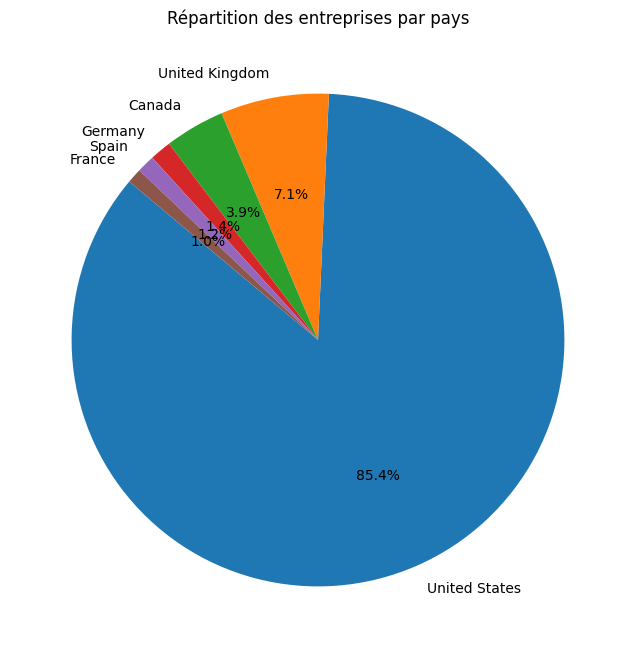

In [346]:
repartition_countries = data['company_location'].value_counts(normalize = True).head(6)
plt.figure(figsize=(8, 8))
plt.pie(repartition_countries, labels=repartition_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des entreprises par pays')
plt.show()

 - Plus de 94 % des emplois liés aux données se trouvent dans les trois principaux pays : United State, United Kingdom et Canada. 85.4 % se situent aux États-Unis.

In [347]:
average_salary_by_experience = data.groupby('experience_level')['salary'].mean().sort_values()
average_salary_by_experience

experience_level
Entry-level     85881.022500
Mid-level      114685.532967
Senior         161699.749129
Executive      185837.977578
Name: salary, dtype: float64

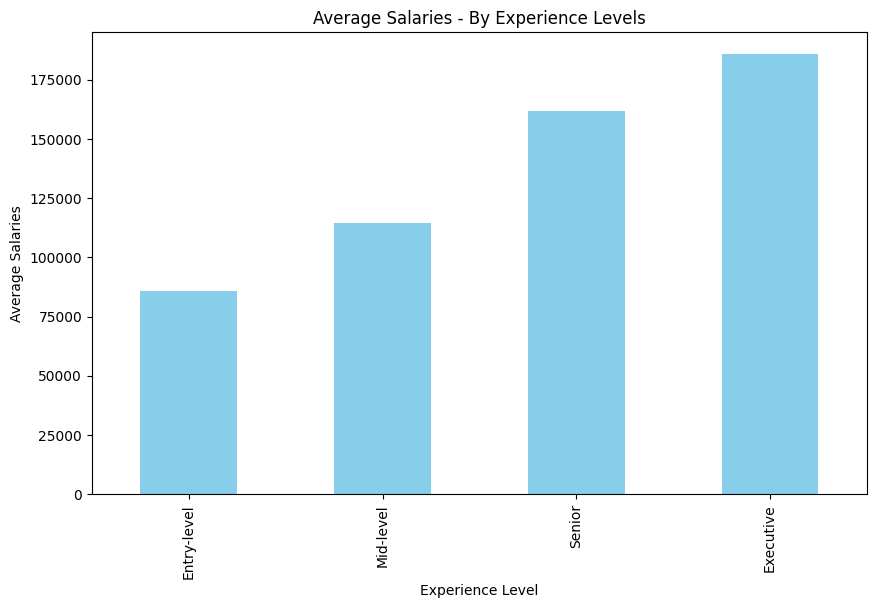

In [348]:
plt.figure(figsize=(10, 6))
average_salary_by_experience.plot(kind='bar', color='skyblue')
plt.title('Average Salaries - By Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Average Salaries')
plt.show()

- On constate une tendance générale où les salaires augmentent avec le niveau d'expérience, avec les niveaux senior et exécutif ayant les moyennes les plus élevées. Cette observation est cohérente avec les attentes courantes sur la progression des salaires en fonction de l'expérience professionnelle.

In [349]:
average_salary_by_year = data.groupby('work_year')['salary'].mean().sort_index()
average_salary_by_year

work_year
2020    106729.704225
2021    108998.764103
2022    132758.809132
2023    151908.070101
Name: salary, dtype: float64

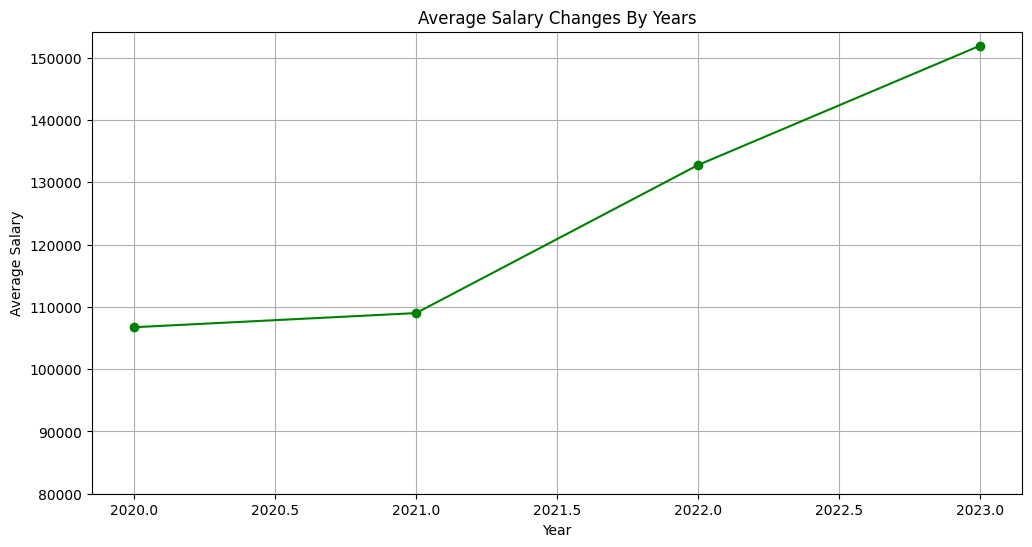

In [350]:
plt.figure(figsize=(12, 6))
plt.plot(average_salary_by_year.index, average_salary_by_year, marker='o', color='green', linestyle='-')
plt.title('Average Salary Changes By Years')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.ylim(80000)
plt.grid(True)
plt.show()

- Ces chiffres indiquent une tendance à l'augmentation des salaires moyens au fil des années, avec une nette augmentation entre 2022 et 2023. Cette progression peut refléter divers facteurs, tels que l'évolution des conditions du marché du travail, la croissance économique ou d'autres influences sectorielles.

In [351]:
average_salary_by_company_size = data.groupby('company_size')['salary'].mean().sort_values()
average_salary_by_company_size

company_size
S     92885.955696
L    128565.420202
M    149420.161903
Name: salary, dtype: float64

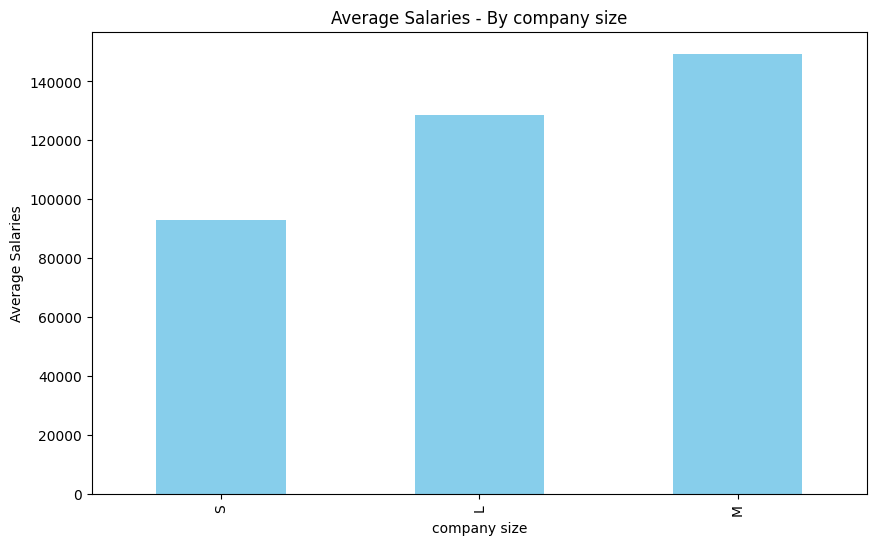

In [352]:
plt.figure(figsize=(10, 6))
average_salary_by_company_size.plot(kind='bar', color='skyblue')
plt.title('Average Salaries - By company size')
plt.xlabel('company size')
plt.ylabel('Average Salaries')
plt.show()

- On constate une tendance où les salaires moyens augmentent avec la taille de l'entreprise, avec les entreprises de taille moyenne ayant la moyenne la plus élevée parmi les catégories de taille. Cette observation est cohérente avec l'idée que les grandes entreprises ou les entreprises de taille moyenne peuvent offrir des salaires plus élevés en raison de leurs ressources financières et de leur structure organisationnelle

In [353]:
average_salary_by_job_category = data.groupby('job_category')['salary'].mean().sort_values().reset_index()
average_salary_by_job_category

,job_category,salary
0,Data Quality and Operations,104188.666667
1,Data Analysis,105805.453646
2,Data Management and Strategy,107588.632653
3,BI and Visualization,129825.361702
4,Data Engineering,142121.087069
5,Leadership and Management,147288.199430
6,Cloud and Database,155000.000000
7,Data Architecture and Modeling,156228.827160
8,Data Science and Research,156659.993958
9,Machine Learning and AI,171121.582334


/tmp/ipykernel_9455/3114561669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary', y='job_category', data=average_salary_by_job_category, palette='plasma')


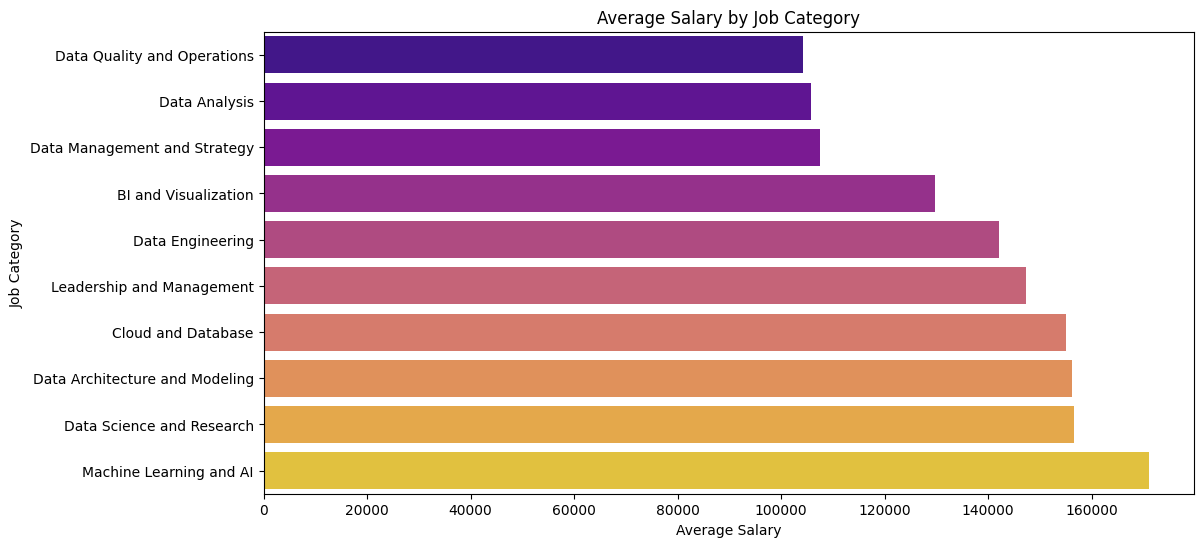

In [354]:
plt.figure(figsize=(12, 6))
sns.barplot(x='salary', y='job_category', data=average_salary_by_job_category, palette='plasma')
plt.title('Average Salary by Job Category')
plt.xlabel('Average Salary')
plt.ylabel('Job Category')
plt.show()


- La catégorie "Machine Learning and AI" affiche la moyenne la plus élevée, indiquant que les rôles liés à l'apprentissage automatique et à l'intelligence artificielle ont tendance à avoir des salaires plus élevés par rapport aux autres catégories

In [355]:
for color in sns.color_palette(n_colors = 10).as_hex():
    print (color)

exp_levels = data['experience_level'].value_counts().sort_values(ascending=False).index
exp_levels_color = sns.color_palette(n_colors = len(exp_levels)).as_hex()

#1f77b4
#ff7f0e
#2ca02c
#d62728
#9467bd
#8c564b
#e377c2
#7f7f7f
#bcbd22
#17becf


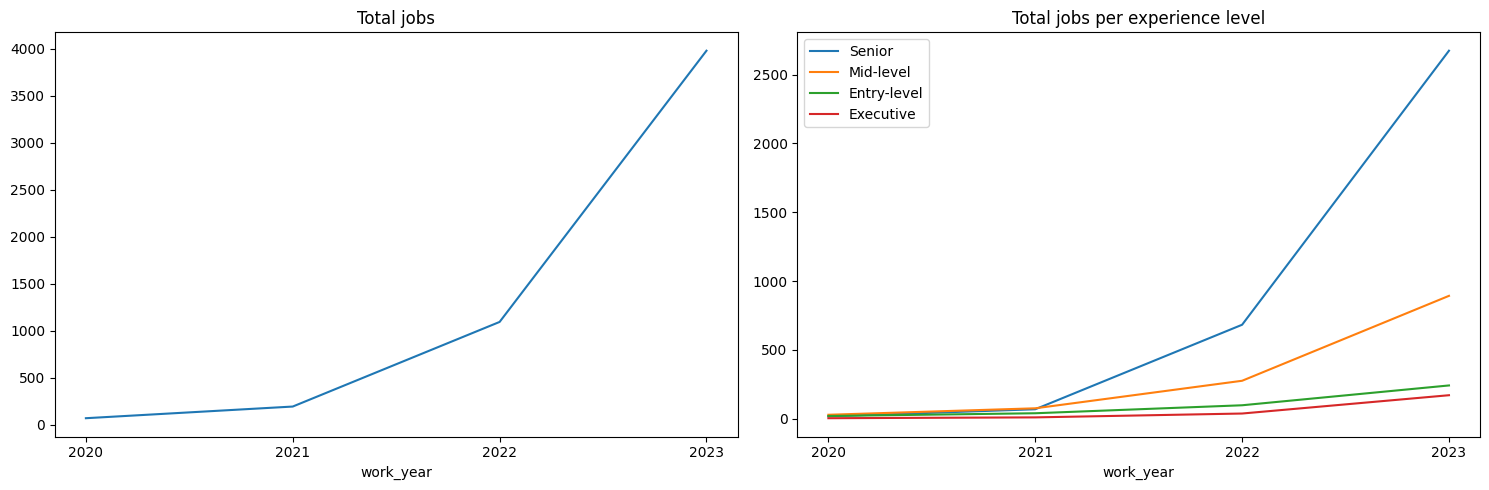

In [356]:
plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
data['work_year'].value_counts().sort_index().plot(
    kind = 'line'
)
plt.xticks(data['work_year'].unique())
plt.title(label = 'Total jobs')

plt.subplot(1, 2, 2)
for exp,color in zip(exp_levels, exp_levels_color):
    data[data['experience_level']==exp]['work_year'].value_counts().sort_index().plot(
        kind = 'line',
        label = exp,
        color = color
    )

plt.xticks(data['work_year'].unique())
plt.legend()
plt.title(label = 'Total jobs per experience level')


plt.tight_layout()
plt.show()

- Le nombre d'emplois a augmenté de manière exponentielle au cours des quatre dernières années, notamment lorsque l'on examine les postes de niveau senior.

<Axes: xlabel='salary_in_usd', ylabel='Count'>

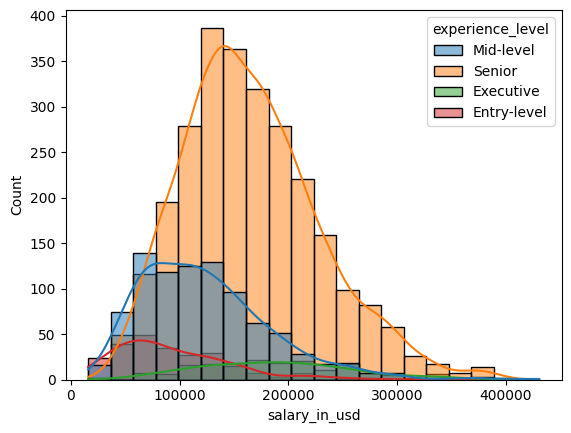

In [357]:
sns.histplot(
    data = data[data['work_year']==2023],
    x = 'salary_in_usd',
    hue = 'experience_level',
    kde = True,
    bins = 20
)

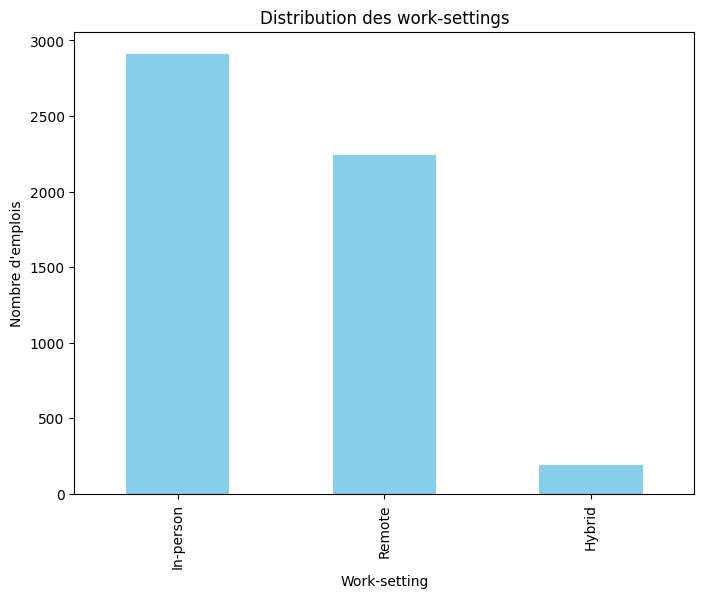

In [358]:
plt.figure(figsize=(8, 6))
data['work_setting'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution des work-settings')
plt.xlabel('Work-setting')
plt.ylabel('Nombre d\'emplois')
plt.show()

work_setting    Hybrid  In-person    Remote
work_year                                  
2020          0.281690   0.225352  0.492958
2021          0.323077   0.133333  0.543590
2022          0.048402   0.396347  0.555251
2023          0.013317   0.612312  0.374372


<Figure size 1000x600 with 0 Axes>

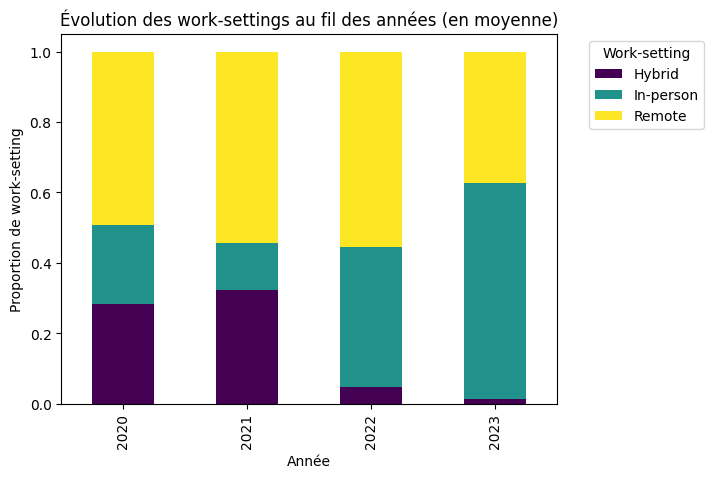

In [359]:
# Grouper par année et work-setting, puis calculer la moyenne
grouped_data = data.groupby(['work_year', 'work_setting']).size().unstack(fill_value=0)

# Calculer la moyenne par année
average_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)
print(average_data)
# Créer un graphique en barres empilées
plt.figure(figsize=(10, 6))
average_data.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Évolution des work-settings au fil des années (en moyenne)')
plt.xlabel('Année')
plt.ylabel('Proportion de work-setting')
plt.legend(title='Work-setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Ces données indiquent une évolution des configurations de travail au fil des ans, caractérisée par une tendance décroissante vers des arrangements plus flexibles, tels que le travail à distance et le travail hybride. Cette diminution de la proportion de configurations de travail en personne peut être interprétée comme une réponse aux changements dans les pratiques professionnelles, potentiellement influencés par des facteurs externes tels que la pandémie de COVID-19.

## Feature Engineering

- Encodage des variables catégorielles.
- Analyse de la corrélation entre les variables numériques.
- Gestion des valeurs aberrantes.


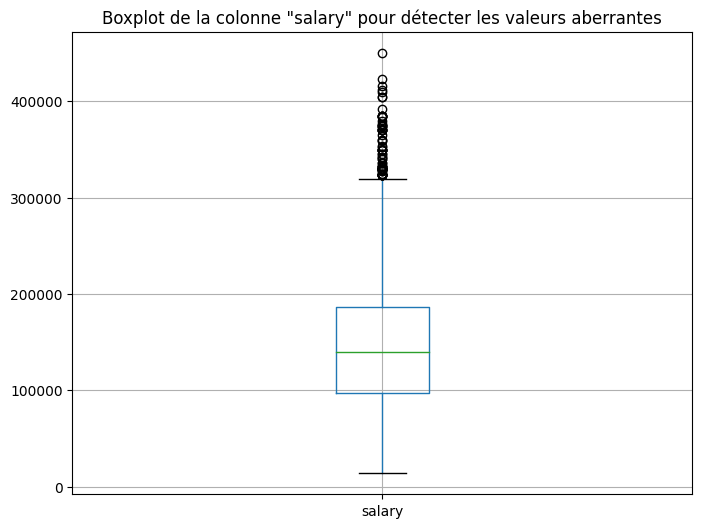

In [360]:
#boxplot pour détecter les valeurs aberrantes dans la colonne 'salary'
plt.figure(figsize=(8, 6))
data.boxplot(column='salary')
plt.title('Boxplot de la colonne "salary" pour détecter les valeurs aberrantes')
plt.show()

In [361]:
# Calcul du z-score pour la colonne 'salary'
z_scores = zscore(data['salary'])

# Définir un seuil de z-score pour considérer une valeur comme aberrante (par exemple, seuil de 3)
threshold = 3
outliers = (abs(z_scores) > threshold)

# Afficher les indices des valeurs aberrantes
print("Indices des valeurs aberrantes :", data.index[outliers].tolist())

Indices des valeurs aberrantes : [173, 810, 888, 1031, 1229, 1696, 1718, 1858, 1862, 1906, 1960, 2211, 2492, 2622, 2710, 2938, 2944, 3080, 3360, 4100, 4194, 4267, 4366, 4737, 5702, 6345, 6947, 6976, 7108, 7683, 8024, 8039, 9103, 9108, 9157, 9287, 9348, 9351]


In [362]:
data = data[~outliers]

In [363]:
# Supprimer la colonne "salary" et la colonne de devise
data.drop(['salary', 'salary_currency'], axis=1, inplace=True)
# Renommer la colonne "salary_in_usd" en "salary"
data.rename(columns={'salary_in_usd': 'salary'}, inplace=True)

In [364]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5303 entries, 0 to 9354
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5303 non-null   int64 
 1   job_title           5303 non-null   object
 2   job_category        5303 non-null   object
 3   salary              5303 non-null   int64 
 4   employee_residence  5303 non-null   object
 5   experience_level    5303 non-null   object
 6   employment_type     5303 non-null   object
 7   work_setting        5303 non-null   object
 8   company_location    5303 non-null   object
 9   company_size        5303 non-null   object
dtypes: int64(2), object(8)
memory usage: 455.7+ KB


In [365]:
lb = LabelEncoder()

In [366]:
data['work_year'] = lb.fit_transform(data['work_year'])
data['job_title'] = lb.fit_transform(data['job_title'])
data['job_category'] = lb.fit_transform(data['job_category'])
data['employee_residence'] = lb.fit_transform(data['employee_residence'])
data['experience_level'] = lb.fit_transform(data['experience_level'])
data['employment_type'] = lb.fit_transform(data['employment_type'])
data['work_setting'] = lb.fit_transform(data['work_setting'])
data['company_location'] = lb.fit_transform(data['company_location'])
data['company_size'] = lb.fit_transform(data['company_size'])

In [367]:
data_encoded = data.copy()

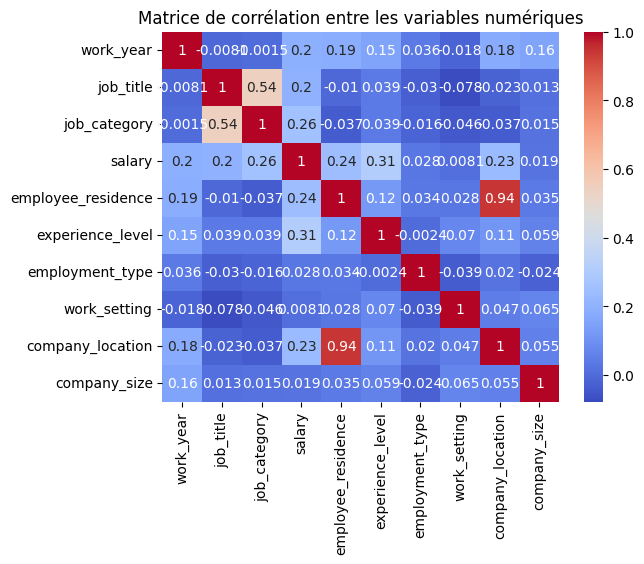

In [368]:
import seaborn as sns
import numpy as np

# Corrélation entre les variables numériques
corr_matrix = data_encoded.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()


## Modélisation et Évaluation

- Utilisation d'un modèle de RandomForestRegressor pour prédire les salaires.
- Sélection des caractéristiques les plus importantes.
- Réévaluation du modèle avec les caractéristiques sélectionnées.
- Exploration d'autres modèles tels que GradientBoostingRegressor et XGBRegressor.
- Utilisation de RandomizedSearchCV pour ajuster les hyperparamètres de XGBRegressor.
- Utilisation de GridSearchCV pour ajuster les hyperparamètres de RandomForestRegressor.
- Évaluation de la performance des modèles à l'aide du Mean Squared Error (MSE) et du coefficient de détermination (R²)


In [369]:
X = data_encoded.drop('salary', axis=1)  # Caractéristiques (toutes les colonnes sauf 'salary')
y = data_encoded['salary']  # Cible (colonne 'salary')

In [370]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [371]:
# Normaliser les données avec MinMaxScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [372]:
# Initialiser et entraîner un modèle de régression (par exemple, RandomForestRegressor)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [373]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

In [374]:
# Évaluer la performance du modèle (par exemple, MSE)
score = model.score(X_train, y_train)
mse = mean_squared_error(y_test, y_pred)
print("Score:",score)
print("Mean Squared Error:", mse)

Score: 0.517475062216903
Mean Squared Error: 2532244517.4307327


In [375]:
# Obtenir l'importance des variables
importance = model.feature_importances_

# Création d'un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importance': importance
})

# Tri des variables par ordre d'importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Affichage de l'importance des variables
print(importance_df)
top_features = importance_df.head(4)['Variable'].tolist()

             Variable  Importance
3  employee_residence    0.290013
1           job_title    0.207668
2        job_category    0.162803
4    experience_level    0.160480
6        work_setting    0.045947
0           work_year    0.045184
7    company_location    0.044283
8        company_size    0.038127
5     employment_type    0.005495


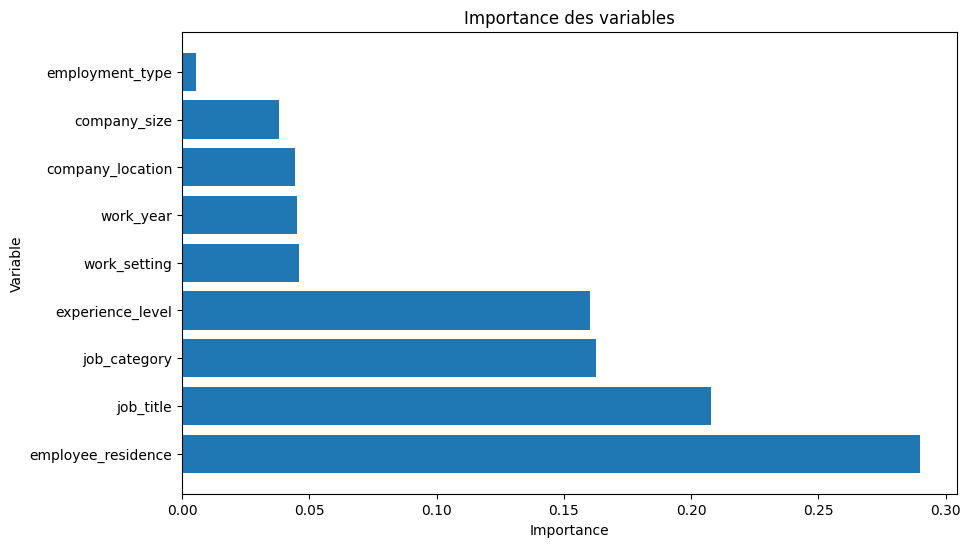

In [376]:
# Graphique de l'importance des variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variable'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables')
plt.show()

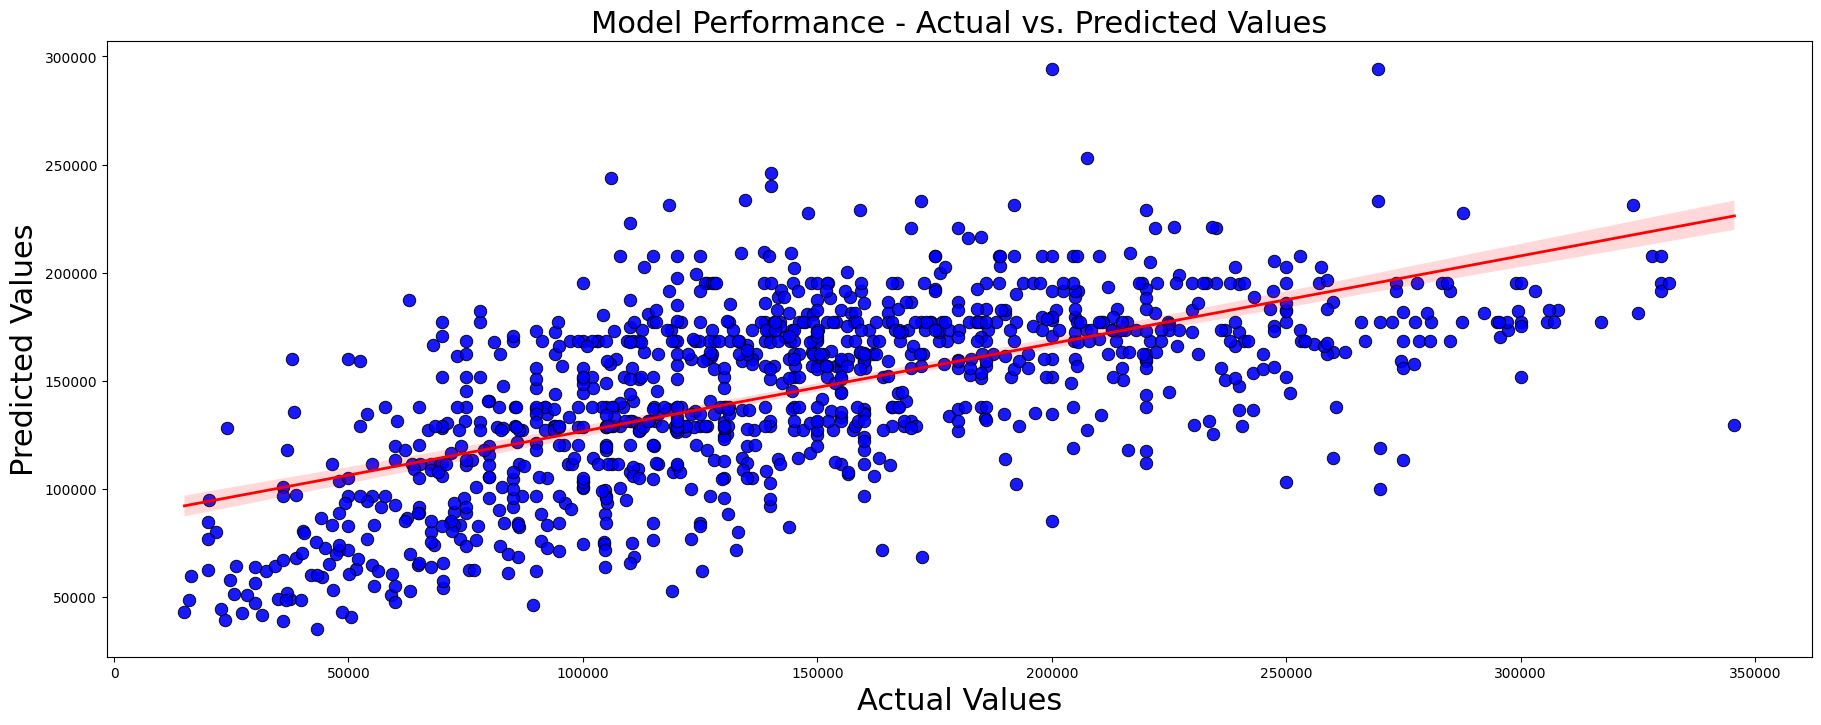

In [377]:


plt.figure(figsize=(22, 8))

sns.scatterplot(x=y_test, y=y_pred, color='b', alpha=0.9, edgecolor='k', s=80)

sns.regplot(x=y_test, y=y_pred, scatter=False, color='r', line_kws={"color": "red", "lw": 2})


plt.xlabel("Actual Values", fontsize=22)
plt.ylabel("Predicted Values", fontsize=22)
plt.title("Model Performance - Actual vs. Predicted Values", fontsize=22)


plt.show()



In [378]:
# Initialiser et entraîner un modèle de gradient boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [379]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

In [380]:
# Évaluer la performance du modèle (par exemple, MSE)
score = model.score(X_train, y_train)
mse = mean_squared_error(y_test, y_pred)
print("Score:",score)
print("Mean Squared Error:", mse)

Score: 0.4155010515476977
Mean Squared Error: 2509690153.8229065


In [381]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1,subsample= 0.9, max_depth= 4, colsample_bytree= 0.9 ,random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [382]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

In [383]:
# Évaluer la performance du modèle (par exemple, MSE)
score = model.score(X_train, y_train)
mse = mean_squared_error(y_test, y_pred)
print("Score:",score)
print("Mean Squared Error:", mse)

Score: 0.44697272334596294
Mean Squared Error: 2442061258.5773005


In [384]:
# Initialiser le modèle RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 150,200],
    'max_depth': [None, 10, 20,25],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4]
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [385]:

# Exécuter la recherche sur la grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres:", best_params)

Meilleurs hyperparamètres: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [386]:
# Utiliser le meilleur modèle pour faire des prédictions sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Évaluer la performance du modèle (par exemple, MSE)
score = best_model.score(X_train, y_train)
mse = mean_squared_error(y_test, y_pred)
print("Score:",score)
print("Mean Squared Error:", mse)

Score: 0.4637150241408796
Mean Squared Error: 2455507314.423239


- Une approche de prédiction des salaires a été mise en œuvre en utilisant un modèle `RandomForestRegressor`, atteignant un score significatif de `0.517` et un Mean Squared Error (MSE) de `2,532,244,517`. L'analyse des caractéristiques a révélé des insights essentiels, soulignant l'importance prépondérante de variables telles que `employee_residence`, `job_title`, `job_category`, et `experience_level` dans la prédiction des salaires.

- En poursuivant nos investigations, d'autres modèles, notamment `GradientBoostingRegressor` et `XGBRegressor`, ont été évalués. Ces modèles ont présenté des performances notables, avec des scores de `0.416` et `0.447`, et des MSE respectifs de `2,509,690,154` et `2,442,061,259`. Cette diversification des modèles offre une vision approfondie des prévisions salariales.

- Dans le but d'optimiser notre approche, un ajustement minutieux des hyperparamètres a été réalisé à l'aide de `GridSearchCV`, résultant en une amélioration légère mais pas significative des performances du modèle `RandomForestRegressor`.

En synthèse, le modèle `RandomForestRegressor` émerge comme une option solide pour prédire les salaires dans le domaine de la data. Toutefois, l'exploration continue d'ajustements et d'analyses approfondies offre un potentiel prometteur pour affiner davantage la performance du modèle.